The purpose of this script is to combine different existing stock analyses and add new insights

In this script, we plot simple graphs to display stock performance of some companies. And we examine different ways of analyzing stocks. Finally, we attempt to predict stock price.

# Part 1

Credit:https://medium.com/datadriveninvestor/introduction-to-stock-analysis-in-python-574246e689e3


In [1]:
import math
import numpy as np
import pandas as pd
import datetime
import pandas_datareader.data as web
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib import style

C:\Users\tjtek\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [36]:
start_date = datetime.datetime(2005, 1, 1)
# end_date = datetime.datetime(2020, 6, 10)
end_date = datetime.datetime.now()

In [3]:
google = web.DataReader('GOOG', 'yahoo', start_date, end_date)
google.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2005-01-03,101.439781,97.365051,98.331429,100.976517,31807000.0,100.976517
2005-01-04,101.086105,96.378746,100.323959,96.886841,27614900.0,96.886841
2005-01-05,98.082367,95.756081,96.363808,96.393692,16534800.0,96.393692
2005-01-06,97.584229,93.509506,97.175758,93.922951,20851900.0,93.922951
2005-01-07,96.762314,94.037521,94.964050,96.563057,19398200.0,96.563057


In [4]:
microsoft = web.DataReader('MSFT', 'yahoo', start_date, end_date)
microsoft.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2005-01-03,26.950001,26.650000,26.799999,26.740000,65002900.0,19.293917
2005-01-04,27.100000,26.660000,26.870001,26.840000,109442100.0,19.366064
2005-01-05,27.100000,26.760000,26.840000,26.780001,72463500.0,19.322775
2005-01-06,27.059999,26.639999,26.850000,26.750000,76890500.0,19.301130
2005-01-07,26.889999,26.620001,26.820000,26.670000,68723300.0,19.243410


In [5]:
# deleting all columns and keeping just the date and adjusted close price
goog_close = google.drop(google.columns[0:5], axis=1)
msft_close = microsoft.drop(microsoft.columns[0:5], axis=1)

> A common approach is to use the close value for analysis and prediction, but which one to choose, as we have “close” and “adjusted close”? Well, according to some sources, like this one and this one, the adjusted price is the most indicated, as it represents a fair picture of the share price, including factors like payment of dividends, stock splits, etc. It’s the one we will use today, but how do we select that? Easy-peasy:

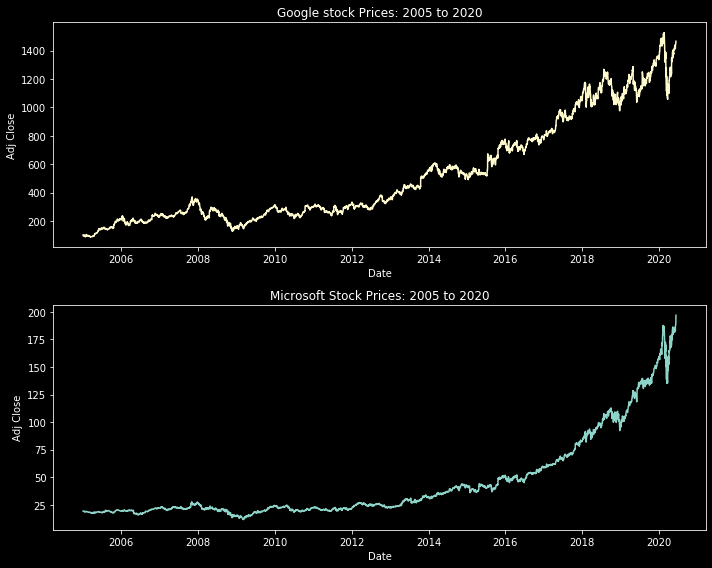

In [6]:
# visualization

style.use('dark_background')
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
sns.lineplot(x=goog_close.index, y=goog_close['Adj Close'], color='lemonchiffon')
plt.title('Google stock Prices: 2005 to 2020')

plt.subplot(2, 1, 2)
ax2 = sns.lineplot(x=msft_close.index, y=msft_close['Adj Close'])
plt.title('Microsoft Stock Prices: 2005 to 2020')
plt.tight_layout()

Google has more volatility than Mocrosoft.

Both companies lost value during 2008, 2015, 2019 and 2020, but they have recuperated their value quite fast.

Google has grown in a relative constant pace since 2012. For Microsoft, we can see a strong ascension curve just after 2014.

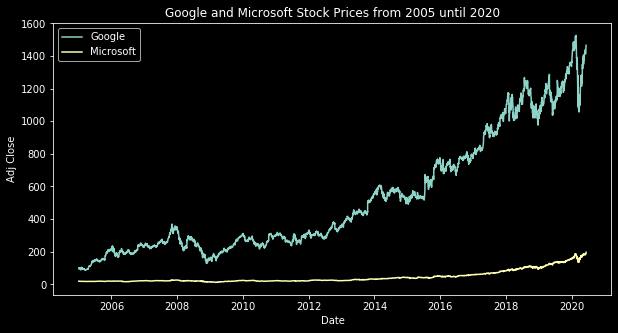

In [7]:
# let's visualize in a line plot how our stocks performed overtime 

# Adjusting the style 
style.use('dark_background')
plt.figure(figsize=(10,5))
ax1= sns.lineplot(x=goog_close.index, y= goog_close['Adj Close'], label='Google')

ax2= sns.lineplot(x=msft_close.index, y=msft_close['Adj Close'], label='Microsoft');

plt.title("Google and Microsoft Stock Prices from 2005 until 2020")

plt.legend()

plt.show()

# Part 2

Credit: https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7 and https://github.com/dustinhutchison/ML_HW2/blob/master/HW2.py

In [37]:
apple = web.DataReader('AAPL', 'yahoo', start_date, end_date) 
apple.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-09,345.609985,332.010010,332.140015,343.989990,36928100.0,343.989990
2020-06-10,354.769989,346.089996,347.899994,352.839996,41662900.0,352.839996
2020-06-11,351.059998,335.480011,349.309998,335.899994,50415600.0,335.899994
2020-06-12,347.799988,334.220001,344.720001,338.799988,50001500.0,338.799988
2020-06-15,345.679993,332.579987,333.250000,342.989990,34642900.0,342.989990


## Moving Average

In [38]:
# moving averge: https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp
# it is a tool that smooths out price data by creating a constantly updated average price.
# find mean
n_days = 100
close_px = apple['Adj Close']
mavg = close_px.rolling(window=n_days).mean() # moving average
mavg.tail(10)

Date
2020-06-02    292.244254
2020-06-03    292.414824
2020-06-04    292.550430
2020-06-05    292.711871
2020-06-08    292.935496
2020-06-09    293.277753
2020-06-10    293.669707
2020-06-11    293.857538
2020-06-12    294.095859
2020-06-15    294.364837
Name: Adj Close, dtype: float64

The Moving Average for the last 10 days steadily rises.

#### Plot the Moving Average

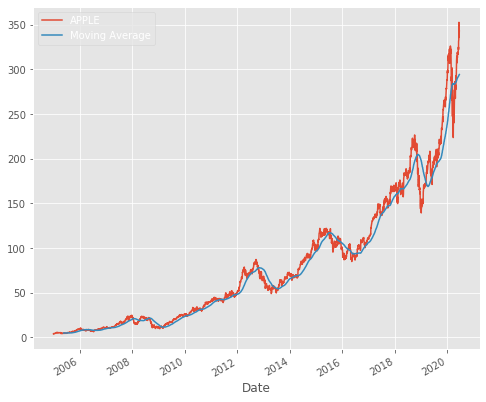

In [39]:
mpl.rc('figure', figsize=(8,7))
style.use('ggplot')
close_px.plot(label='APPLE')
mavg.plot(label='Moving Average')
plt.legend()

> The Moving Average makes the line smooth and showcase the increasing or decreasing trend of stocks price

> Logically, you should buy when the stocks are experiencing downturn and sell when the stocks are experiencing upturn.

> Expected Return: measuring the mean, or expected value, of the probability distribution of investment returns. The expected return of a portfolio is calculated by multiplying the weight of each asset by its expected return and adding the values for each investment - Investopedia

## Return Rate

#### Plot Return Rate

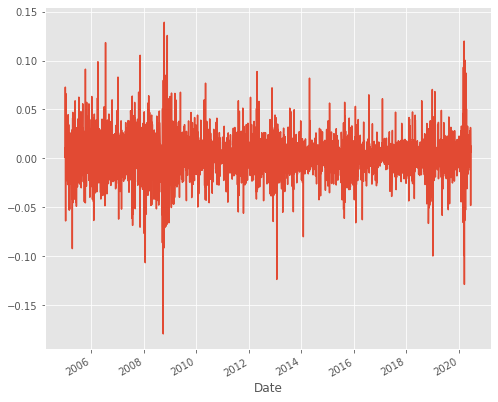

In [40]:
returns = close_px / close_px.shift(1) - 1
returns.plot(label='return')

> Logically, out ideal stocks should return as highas stable as possible. If you are risk averse(like me), you might want to avoid this stocks as you saw the 10% or more drops in [2008, ]2013, [and 2020]. This decision is heavily subjected to your general sentiment of the stocks and competitor analysis.

## Analyze on how one company performs in relative with its competitors

In [41]:
competitors = web.DataReader(
    ['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],
    'yahoo',
    start=start_date, 
    end=end_date
)['Adj Close']
competitors.tail()

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2020-06-09,343.989990,8.02,1456.160034,131.869995,189.800003
2020-06-10,352.839996,7.61,1465.849976,129.869995,196.839996
2020-06-11,335.899994,6.95,1403.839966,118.010002,186.270004
2020-06-12,338.799988,7.25,1413.180054,121.910004,187.740005
2020-06-15,342.989990,7.24,1419.849976,121.650002,188.940002


#### Correlation

In [42]:
retscomp = competitors.pct_change() # percentage change
corr_comp = retscomp.corr() # correlation
corr_comp

Symbols,AAPL,GE,GOOG,IBM,MSFT
Symbols,,,,,
AAPL,1.000000,0.405324,0.525093,0.471876,0.495289
GE,0.405324,1.000000,0.393074,0.515324,0.433720
GOOG,0.525093,0.393074,1.000000,0.448403,0.548194
IBM,0.471876,0.515324,0.448403,1.000000,0.556068
MSFT,0.495289,0.433720,0.548194,0.556068,1.000000


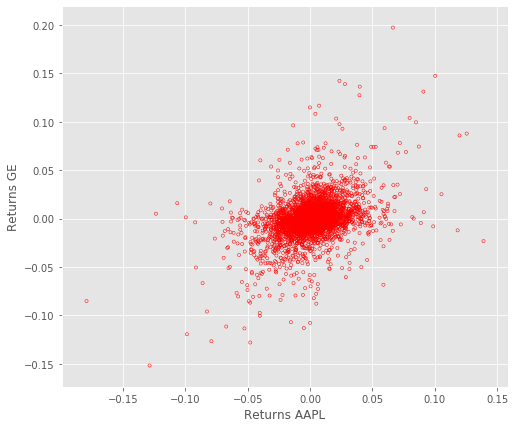

In [43]:
plt.scatter(retscomp.AAPL, retscomp.GE, marker='o', s=10, facecolors='none', edgecolors='r')
plt.xlabel('Returns AAPL')
plt.ylabel('Returns GE')
plt.show()

slight positive correlations among GE returns and Apple returns.

#### Kernel Density Estimation

> A non-parametric way to estimate the probability density function of a random variable. - Wikipedia

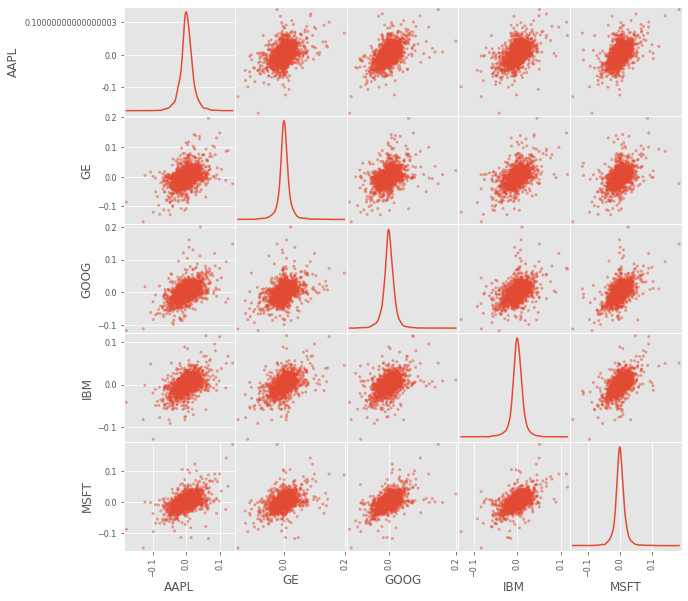

In [44]:
pd.plotting.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

approximately positive correlations

#### Heatmap of Correlations among competing stocks

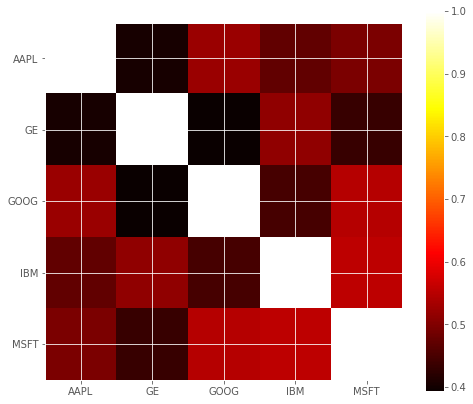

In [45]:
plt.imshow(corr_comp, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_comp)), corr_comp.columns)
plt.yticks(range(len(corr_comp)), corr_comp.columns);

the lighter the color, the more correlated the two stocks are.

#### Plot the Average of Return Rate

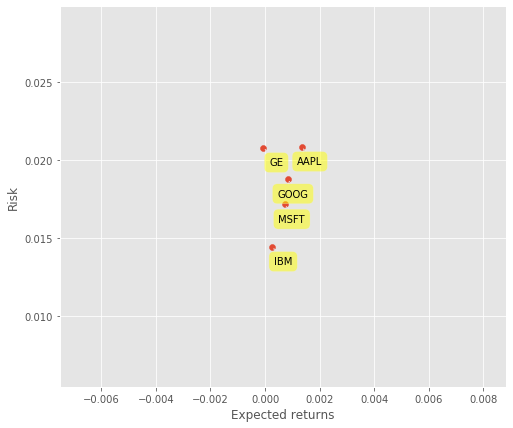

In [46]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(label,
                 xy=(x, y),
                 xytext=(20,-20),
                 textcoords='offset points',
                 ha='right',
                 va='bottom',
                 color='black',
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3, rad=0'))

You would want to draw the line for your risk-return tolerance to minimize the risk and maximize returns.

For example,

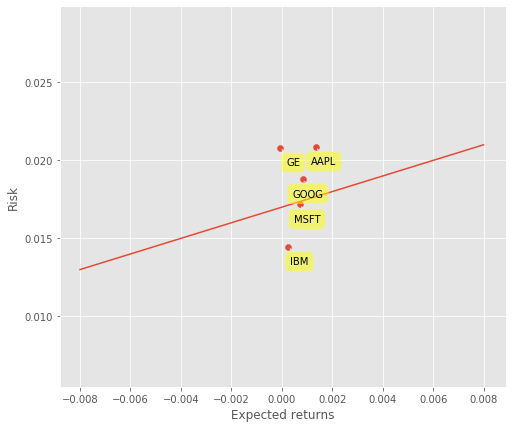

In [47]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(label,
                 xy=(x, y),
                 xytext=(20,-20),
                 textcoords='offset points',
                 ha='right',
                 va='bottom',
                 color='black',
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3, rad=0'))
plt.plot([-0.008,0.008], [0.013,0.021])

## Predicting Stocks Price

using Simple Linear Analysis, Quadratic Discriminant Analysis (QDA), and K Nearest Neighbor (KNN)

In [132]:
# percentage change
apple_reg = apple.loc[:, ['Adj Close', 'Volume']]
apple_reg['HL_PCT'] = (apple['High'] - apple['Low']) / apple['Close'] * 100.0
apple_reg['PCT_change'] = (apple['Close'] - apple['Open']) / apple['Open'] * 100.0
apple_reg.tail()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2020-06-09,343.989990,36928100.0,3.953596,3.567765
2020-06-10,352.839996,41662900.0,2.460036,1.419949
2020-06-11,335.899994,50415600.0,4.638281,-3.838998
2020-06-12,338.799988,50001500.0,4.008261,-1.717340
2020-06-15,342.989990,34642900.0,3.819355,2.922728


In [133]:
# drop missing values
apple_reg.fillna(value=-99999, inplace=True)
# separate 1 percent of the data
forecast = int(math.ceil(0.01 * len(apple_reg))) # this doesn't make sense
predict_col = 'Adj Close'
apple_reg['label'] = apple_reg[predict_col].shift(-forecast)
apple_X = np.array(apple_reg.drop(['label'], 1))
# scale
apple_X = preprocessing.scale(apple_X)
# sort
recent_apple_X = apple_X[-forecast:]
apple_X = apple_X[:-forecast]
# assign label
apple_y = np.array(apple_reg['label'])
apple_y = apple_y[:-forecast]

C:\Users\tjtek\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [134]:
from sklearn import model_selection

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.metrics import mean_squared_error, r2_score

In [135]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(apple_X, apple_y, test_size=0.2)

In [150]:
# linear regression
apple_linear = LinearRegression(n_jobs=-1)
apple_linear.fit(X_train, y_train)
linear_pred = apple_linear.predict(recent_apple_X)

In [151]:
# quadratic regression 2
apple_poly2 = make_pipeline(PolynomialFeatures(2), Ridge())
apple_poly2.fit(X_train, y_train)
poly2_pred = apple_poly2.predict(recent_apple_X)
# quadratic regression 3
apple_poly3 = make_pipeline(PolynomialFeatures(3), Ridge())
apple_poly3.fit(X_train, y_train)
poly3_pred = apple_poly3.predict(recent_apple_X)

In [152]:
# KNN Regression
apple_knn = KNeighborsRegressor(n_neighbors=2)
apple_knn.fit(X_train, y_train)
knn_pred = apple_knn.predict(recent_apple_X)

In [139]:
apple_reg['Forecast'] = np.nan

#### Regression Numeric Analysis

In [93]:
print('Linear Regression')
print('Coefficients: ', str(apple_linear.coef_))
print('Mean Squared Error: ', str(mean_squared_error(y_test, linear_pred)))
print('Coefficient of Determination: ', str(r2_score(y_test, linear_pred)))
print()
print('Quadratic Regression 2')
print('Coefficients: ', str(apple_poly2.named_steps.ridge.coef_))
print('Mean Squared Error: ', str(mean_squared_error(y_test, poly2_pred)))
print('Coefficient of Determination: ', str(r2_score(y_test, poly2_pred)))
print()
print('Quadratic Regression 3')
print('Coefficients: ', str(apple_poly3.named_steps.ridge.coef_))
print('Mean Squared Error: ', str(mean_squared_error(y_test, poly3_pred)))
print('Coefficient of Determination: ', str(r2_score(y_test, poly3_pred)))

Linear Regression
Coefficients:  [ 7.45561696e+01 -1.46281592e+00  4.45562640e-01 -1.04101295e-02]
Mean Squared Error:  227.84670707405806
Coefficient of Determination:  0.9604361614005128

Quadratic Regression 2
Coefficients:  [ 0.00000000e+00  7.09334024e+01 -6.43604619e+00  8.80364330e-01
 -1.93552021e-01 -1.96502237e+00 -8.60528778e+00  2.20162770e+00
 -2.24737068e-01 -4.08869787e-01  3.42493293e-01 -1.70009446e-01
  3.72678311e-02  1.38701885e-01 -8.57472161e-02]
Mean Squared Error:  209.80255823807448
Coefficient of Determination:  0.9635693898828535

Quadratic Regression 3
Coefficients:  [ 0.00000000e+00  7.13058367e+01 -3.02980892e+00  1.32016284e+00
 -5.23665305e-01 -1.37274037e+00 -7.33472953e+00  2.53451663e+00
 -1.47374882e+00 -1.73511875e+00  1.95148998e+00 -1.66977834e+00
  7.45550189e-01  5.50671280e-01 -2.60166431e-01 -2.95367323e+00
 -1.13809978e+01  1.59339561e+00 -6.28570767e-01 -5.31447263e+00
  3.58411897e+00 -1.83661111e+00  8.43386954e-01  1.12553873e+00
 -7.1519

In [71]:
# Evaluation
confidence_linear_reg = apple_linear.score(X_test, y_test)
confidence_poly2 = apple_poly2.score(X_test, y_test)
confidence_poly3 = apple_poly3.score(X_test, y_test)
confidence_knn = apple_knn.score(X_test, y_test)

print('The linear regression confidence is ', str(confidence_linear_reg))
print('The quadratic regression 2 confidence is ', str(confidence_poly2))
print('The quadratic regression 3 confidence is ', str(confidence_poly3))
print('The KNN regression confidence is ', str(confidence_knn))

The linear regression confidence is  -16.175157592688258
The quadratic regression 2 confidence is  -16.468490133169794
The quadratic regression 3 confidence is  -15.115494494123778
The KNN regression confidence is  0.8940941903663675


#### Plotting the Prediction

In [171]:
def plot_prediction(df, pred_series, title):
    reg_df = df.copy()
    
    reg_df['Forecast'] = np.nan
    last_date = reg_df.iloc[-1].name
    last_unix = last_date
    next_unix = last_unix + datetime.timedelta(days=1)

    for i in pred_series:
        next_date = next_unix
        next_unix += datetime.timedelta(days=1)
        reg_df.loc[next_date] = [np.nan for _ in range(len(reg_df.columns) - 1)] + [i]

    reg_df['Adj Close'].tail(200).plot()
    reg_df['Forecast'].tail(500).plot()
    
    plt.title(title)
    plt.legend(loc=4)
    plt.setp(plt.legend().get_texts(), color='black')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

Linear Regression

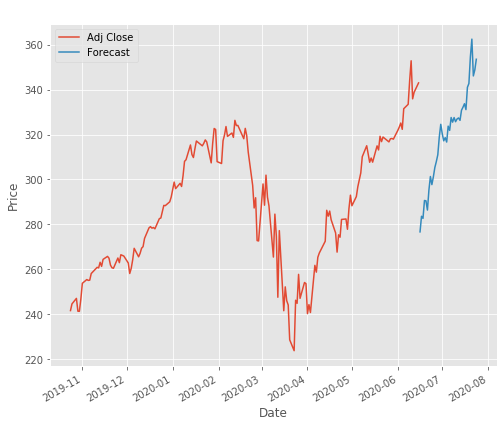

In [172]:
plot_prediction(df=apple_reg, pred_series=linear_pred, title='apple')

Polynomial 2

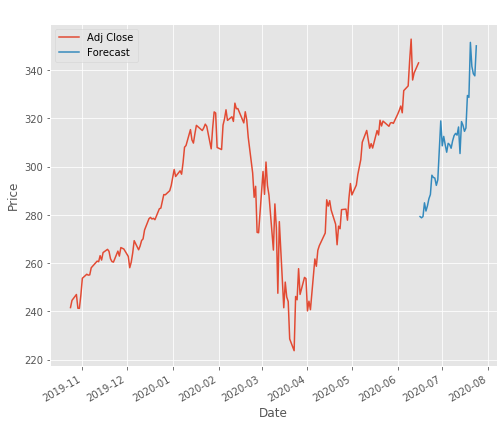

In [173]:
plot_prediction(df=apple_reg, pred_series=poly2_pred, title='apple')

Polynomial 3

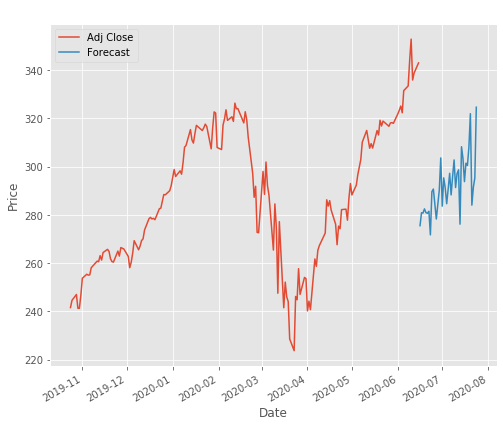

In [174]:
plot_prediction(df=apple_reg, pred_series=poly3_pred, title='apple')

KNN

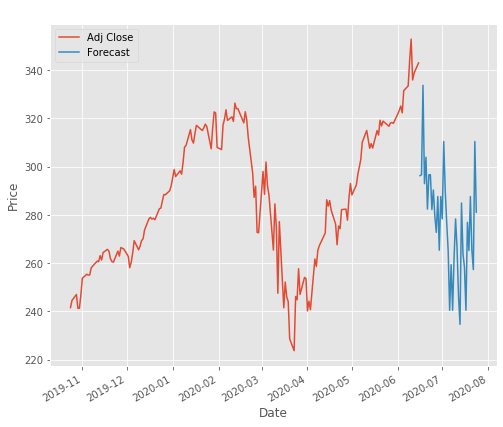

In [175]:
plot_prediction(df=apple_reg, pred_series=knn_pred, title='apple')